In [1]:
#Read from CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('WiiSportsClub.csv', sep = ',', encoding = 'latin-1')
del df['URL']

print(df)

       Run ID   User ID      User Name       Category  Hours  Minutes  \
0    1zq3qe5y  qjngyw8m  TheCrazyCroco  Golf: 3 Holes    0.0      3.0   
1    8yvjxp4y  qjngyw8m  TheCrazyCroco     All Sports    0.0     33.0   
2    pzgv9gnz  y8dq0lj6        Keiichi  Golf: 9 Holes    0.0      9.0   
3    8yvegv8m  48gmye78     Félicien2B     All Sports    0.0     32.0   
4    zpqk82ry  5j59ydwx      Alaskaxp2     All Sports    0.0     25.0   
..        ...       ...            ...            ...    ...      ...   
367  zpl9d2gm  8qzm1v78        K-Patch      Max Level    4.0     39.0   
368  ylv71lxm  8qzm1v78        K-Patch      Pro Class    0.0     56.0   
369  z09pn4jz  qj2lgw7x         Zennan       Training    0.0      4.0   
370  ywd3ng3z  qj2lgw7x         Zennan       Training    0.0      4.0   
371  zxd704gy  8qzm1v78        K-Patch     All Stamps    0.0     35.0   

     Seconds Platform ID Platform Name  Verified        Date  
0       44.0    8gejn93d          WiiU  verified  2015-02-26

In [2]:
#Clean data

df = df.loc[(df['Category'] == 'All Sports') & (df['Verified'] == 'verified') & (df['Date'].notnull())]
df = df.rename({'User Name': 'userName'}, axis=1)
df = df.sort_values(["Date"])
del df['Verified']
del df['Run ID']
del df['User ID']

totalSeconds = []

for x in range(len(df)):
    seconds = 0.0
    seconds += (df.iloc[x].Hours * 3600) + (df.iloc[x].Minutes * 60) + (df.iloc[x].Seconds)
    totalSeconds.append(seconds)

df['TimeSeconds'] = totalSeconds
df = df[['userName', 'Category', 'Hours', 'Minutes', 'Seconds', 'TimeSeconds', 'Platform Name', 'Date']]

print(df)

          userName    Category  Hours  Minutes  Seconds  TimeSeconds  \
1    TheCrazyCroco  All Sports    0.0     33.0      0.0       1980.0   
3       Félicien2B  All Sports    0.0     32.0     32.0       1952.0   
4        Alaskaxp2  All Sports    0.0     25.0      3.0       1503.0   
28      GamingLand  All Sports    0.0     26.0     16.0       1576.0   
30      GamingLand  All Sports    0.0     22.0     55.0       1375.0   
40       Alaskaxp2  All Sports    0.0     21.0     17.0       1277.0   
44        kreyfish  All Sports    0.0     28.0     21.0       1701.0   
45      GamingLand  All Sports    0.0     22.0     27.0       1347.0   
58      GamingLand  All Sports    0.0     16.0     48.0       1008.0   
63        kreyfish  All Sports    0.0     21.0     14.0       1274.0   
65      Jay_Kuchen  All Sports    0.0     29.0     28.0       1768.0   
66      GamingLand  All Sports    0.0     16.0     17.0        977.0   
77      Félicien2B  All Sports    0.0     24.0     58.0       14

          userName    Category  Hours  Minutes  Seconds  TimeSeconds  \
1    TheCrazyCroco  All Sports    0.0     33.0      0.0       1980.0   
3       Félicien2B  All Sports    0.0     32.0     32.0       1952.0   
4        Alaskaxp2  All Sports    0.0     25.0      3.0       1503.0   
30      GamingLand  All Sports    0.0     22.0     55.0       1375.0   
40       Alaskaxp2  All Sports    0.0     21.0     17.0       1277.0   
58      GamingLand  All Sports    0.0     16.0     48.0       1008.0   
66      GamingLand  All Sports    0.0     16.0     17.0        977.0   
88    Wipeoutjack7  All Sports    0.0     13.0     53.0        833.0   
112   Wipeoutjack7  All Sports    0.0     13.0     31.0        811.0   
133      CedrikPle  All Sports    0.0     12.0      0.0        720.0   
146      CedrikPle  All Sports    0.0     11.0     28.0        688.0   
293      CedrikPle  All Sports    0.0     11.0     19.0        679.0   

    Platform Name        Date  
1            WiiU  2015-02-26  

Text(0.5, 1.0, 'Wii Sports Club (All Sports) World Record Progression')

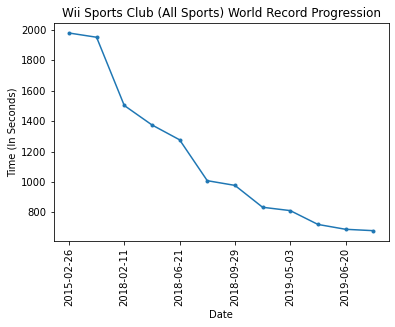

In [3]:
#Find World Record Progression

worldRecords = []
minTime = df.iloc[0].TimeSeconds

for x in range(len(df)):
    if df.iloc[x].TimeSeconds <= minTime:
        worldRecords.append(df.iloc[x])
        minTime = df.iloc[x].TimeSeconds

wrdf = pd.DataFrame(worldRecords)
print(wrdf)

wrdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports Club (All Sports) World Record Progression")

Number of improvements: 7
Number of same times: 6
Total runners: 13
         UserName  Fastest   First  PercentImprovement
2         Jonasty    816.0   816.0           -0.000000
3          Memery    818.0   818.0           -0.000000
5          Zennan    943.0   943.0           -0.000000
7          MiiWii   1011.0  1011.0           -0.000000
11     Jay_Kuchen   1768.0  1768.0           -0.000000
12  TheCrazyCroco   1980.0  1980.0           -0.000000
1    Wipeoutjack7    811.0   833.0            2.641056
0       CedrikPle    679.0   720.0            5.694444
9       Alaskaxp2   1277.0  1503.0           15.036593
4   EpicCrossover    859.0  1077.0           20.241411
8        kreyfish   1274.0  1701.0           25.102881
10     Félicien2B   1282.0  1952.0           34.323770
6      GamingLand    977.0  1576.0           38.007614


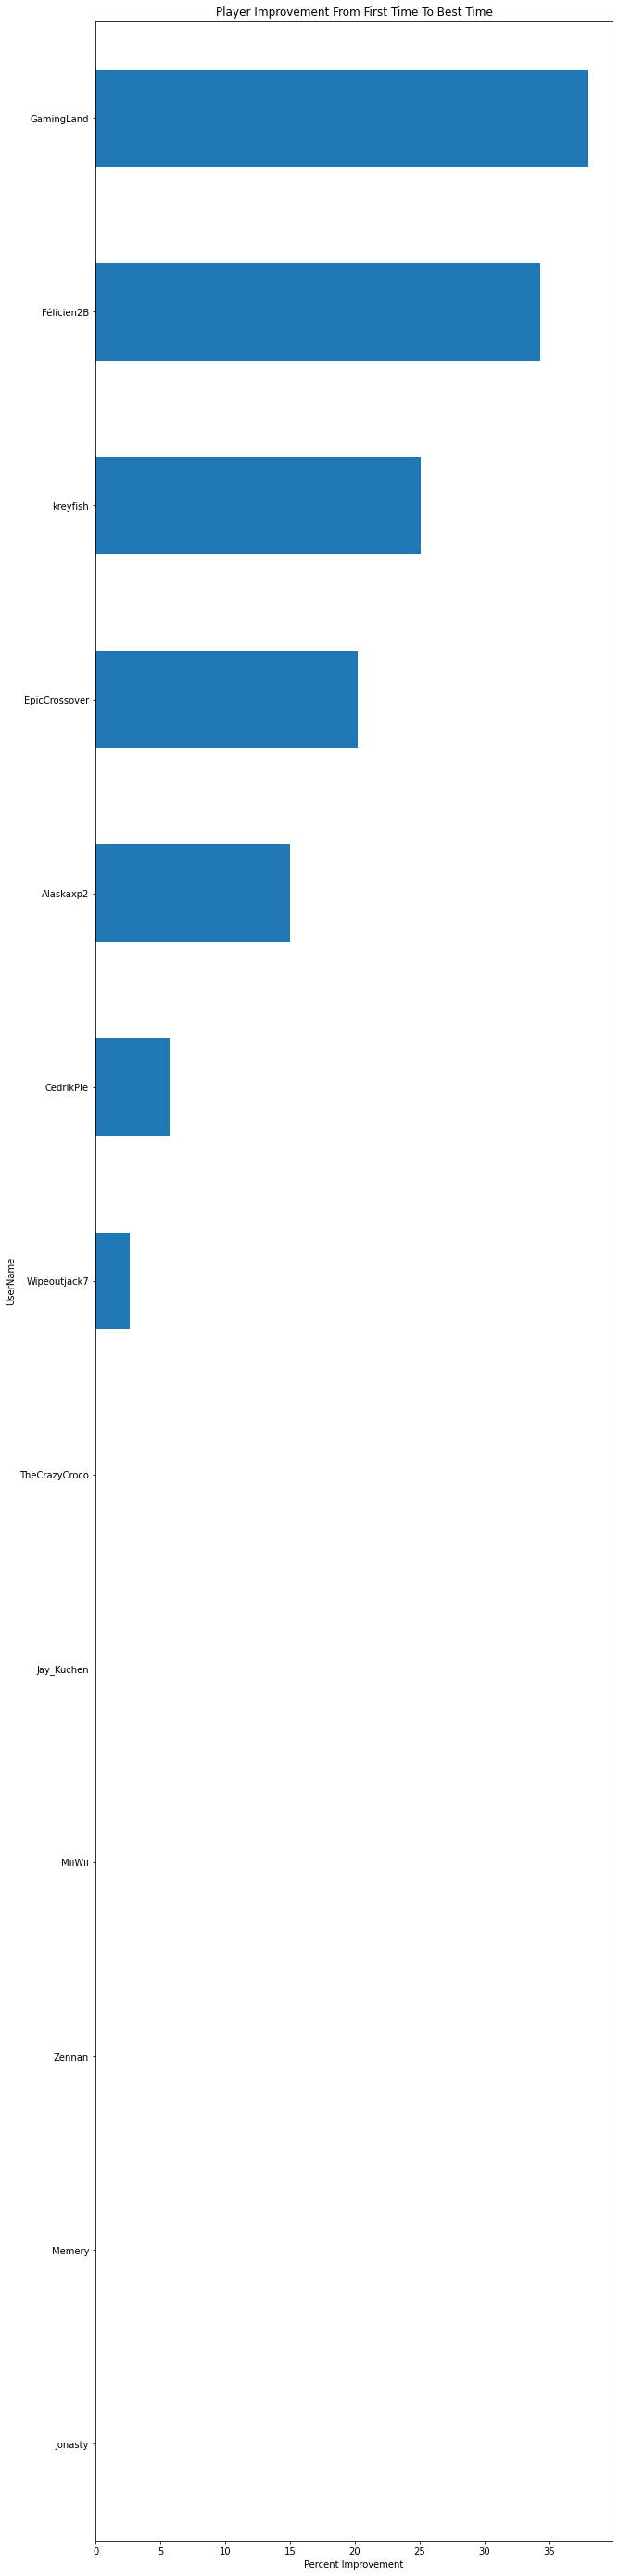

In [7]:
#Print Leadboard

rankingsFirst = df.sort_values(["Hours", "Minutes", "Seconds"])
rankingsFirst = rankingsFirst.drop_duplicates(subset = "userName")

rankingsLast = df.sort_values(["Date"])
rankingsLast = rankingsLast.drop_duplicates(subset = "userName")

quad = []

for x in range (len(rankingsFirst)):
    for y in range (len(rankingsLast)):
        if rankingsFirst.iloc[x].userName == rankingsLast.iloc[y].userName:
            fastest = rankingsFirst.iloc[x].TimeSeconds
            first = rankingsLast.iloc[y].TimeSeconds
            increase = (fastest - first) / first * 100
            increase = -increase
            quad.append((rankingsFirst.iloc[x].userName, fastest, first, increase))

count = 0
same = 0

for x in quad:
    if (x[1] < x[2]):
        count += 1
    elif (x[1] == x[2]):
        same += 1;
        
print("Number of improvements: " + str(count))
print("Number of same times: " + str(same))
print("Total runners: " + str(len(quad)))

improvementdf =  pd.DataFrame(quad, columns = ['UserName', 'Fastest', 'First', 'PercentImprovement'])
improvementdf = improvementdf.sort_values(["PercentImprovement"])
improvementdf.plot(kind = "barh", x = "UserName", y = "PercentImprovement", figsize = (10,50), legend = False)
plt.title("Player Improvement From First Time To Best Time")
plt.xlabel("Percent Improvement")
print(improvementdf)

      userName    Category  Hours  Minutes  Seconds  TimeSeconds  \
133  CedrikPle  All Sports    0.0     12.0      0.0        720.0   
146  CedrikPle  All Sports    0.0     11.0     28.0        688.0   
293  CedrikPle  All Sports    0.0     11.0     19.0        679.0   

    Platform Name        Date  
133          WiiU  2019-06-01  
146          WiiU  2019-06-20  
293          WiiU  2020-05-14  
         userName    Category  Hours  Minutes  Seconds  TimeSeconds  \
88   Wipeoutjack7  All Sports    0.0     13.0     53.0        833.0   
112  Wipeoutjack7  All Sports    0.0     13.0     31.0        811.0   

    Platform Name        Date  
88           WiiU  2019-03-31  
112          WiiU  2019-05-03  
    userName    Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
352  Jonasty  All Sports    0.0     13.0     36.0        816.0          WiiU   

           Date  
352  2020-09-24  
    userName    Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
315   Memery

Text(0.5, 1.0, 'Wii Sports (All Sports) EpicCrossover Progression')

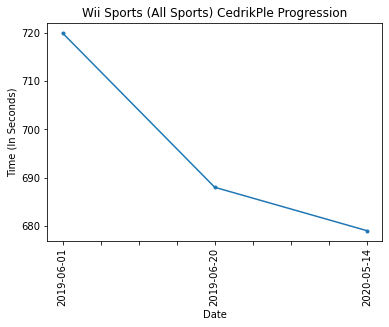

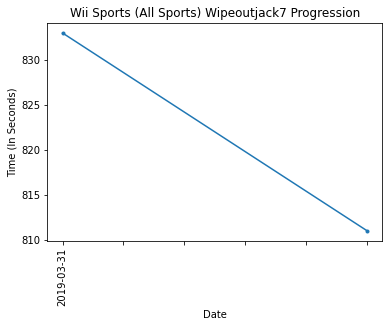

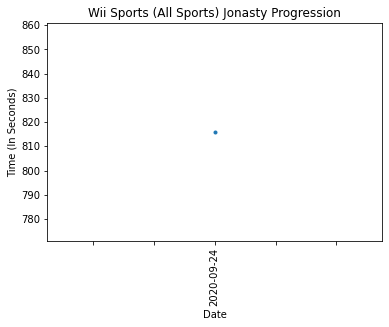

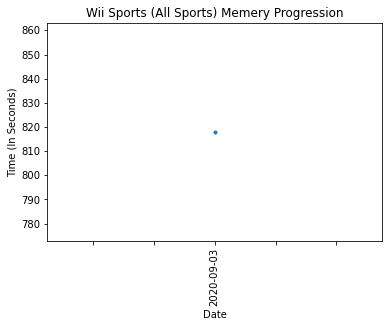

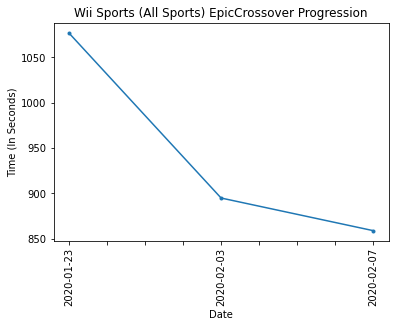

In [6]:
#Graph 5 Fastest Players

wrhdf = df.loc[df['userName'] == 'CedrikPle']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) CedrikPle Progression")

wrhdf = df.loc[df['userName'] == 'Wipeoutjack7']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) Wipeoutjack7 Progression")

wrhdf = df.loc[df['userName'] == 'Jonasty']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) Jonasty Progression")

wrhdf = df.loc[df['userName'] == 'Memery']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) Memery Progression")

wrhdf = df.loc[df['userName'] == 'EpicCrossover']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) EpicCrossover Progression")

Text(0.5, 1.0, 'WiiSports Platform Distribution')

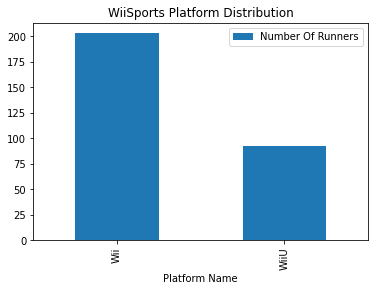

In [280]:
wiiUCount = np.count_nonzero(df['Platform Name']=='WiiU')

platformsArray = ([ ['WiiU', wiiUCount]])
platformdf = pd.DataFrame(data = platformsArray, columns = ['Platform Name', 'Number Of Runners'])

platformdf.plot(kind = 'bar', x='Platform Name', y='Number Of Runners', legend = True)
plt.title("Wii Sports Resort Platform Distribution")

Text(0.5, 1.0, 'Wii Sports Quantity of Runs by Year')

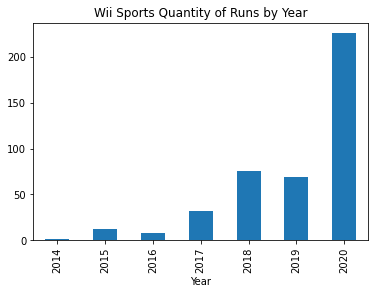

In [282]:
count2014 = np.count_nonzero(df['Date'] < '2015-01-01')
count2015 = np.count_nonzero(df['Date'] < '2016-01-01') - count2014
count2016 = np.count_nonzero(df['Date'] < '2017-01-01') - count2015
count2017 = np.count_nonzero(df['Date'] < '2018-01-01') - count2016
count2018 = np.count_nonzero(df['Date'] < '2019-01-01') - count2017
count2019 = np.count_nonzero(df['Date'] < '2020-01-01') - count2018
count2020 = np.count_nonzero(df['Date']) - count2019

monthsArray = ([ ['2014', count2014], ['2015', count2015], ['2016', count2016], ['2017', count2017], ['2018', count2018], ['2019', count2019], ['2020', count2020]])
monthsdf = pd.DataFrame(data = monthsArray, columns = ['Year', 'Number of Runs Submitted'])

monthsdf.plot(kind = 'bar', x = 'Year', y='Number of Runs Submitted', legend = False)
plt.title("Wii Sports Quantity of Runs by Year")